# Churn Analysis

Aqui iniciamos o processo de análise de churn para clientes do banco, todo o racional e os objetivos de ter uma análise de churn dentro uma empresa estão no ReadMe do projeto no githyb, então neste notebook concentraremos esforços para criar uma solução pra esse problema.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando os dados
df = pd.read_csv('dados\churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Análise Exploratória

In [3]:
# Shape do dataset
df.shape

(10000, 14)

In [4]:
# Informação sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Nesta primeira análise, verificamos que temos 3 tipos de variáveis. Tipo: float, int e object. Agora, podemos definir o que é variável categórica e numérica, para ser feito uma análise posteriormente.

Variáveis numéricas: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

Variáveis categóricas: Geography, Gender, HasCrCard, IsActiveMember, Exited

É importante ficar atento pois algumas variáveis categóricas são números, o que pode levar a pensar que é uma variável numérica quando na verdade não é.

Verificando se os dataset não tem dados nulos, pelo resumo acima não tem, mas vamos verificar de novo usando os isnull() pra garantir 

In [5]:
# Verificando valores nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Certo, o conjunto de dados não possui registros nulos, então não será necessário aplicar técnicas de imputação pelo que parece.

Na próxima célula, será verificado a quantidade de valores únicos para cada coluna.

In [6]:
# Verificando valores únicos
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Já identificamos o tipo de variáveis e também verificamos que não tem dados nulos, sendo assim podemos fazer uma análise mais aprofundada das variáveis para podermos entender o comportamento das mesmas

In [7]:
# Variáveis numéricas
var_num = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Variáveis categóricas
var_cat = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Separando variáveis numéricas
df_num = df[var_num]

# Separando variáveis categóricas
df_cat = df[var_cat]

Usando o describe, vamos verificar como estão distribuidas as variáveis numéricas. Este método fornece algumas medidas estatísticas dos dados, como média, mediana, desvio padrão, e também traz informações sobre os quartis, valores máximos e mínimos.

In [8]:
# Explorando variáveis
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Através dessa análise, é possível verificar que:
- Os cliente possuem em média 39 anos de idade, temos clientes de 18 a 92 anos de idade.
- Em média, o score de crédito está em 652, como valor máximo de 850 e mínimo de 350.
- O tempo médio que o cliente permanece ativo, é de 5 anos.
- O salário médio dos clientes é de 100.000 dólares por ano.
- Os clientes têm em média 76.000 dólares na conta bancária.
- O número de produtos que são consumidos é de 1,5 em média.
- 70% dos clientes possuem cartão de crédito.
- 51,5% são membros ativos do banco.
- 20% deixaram de ser clientes do banco.

## Análise Univariada

Agora, vamos analisar variável a variável para entendermos melhor a distribuição de cada uma. Posteriormente, vamos analisar as variáveis relacionando com a variável alvo, que é a taxa de churn.

Esta etapa é importante para entender a base de dados em si, pode ser entendida com a etapa de Data Quality Report. 

**Credit Score**

Text(0.5, 0, 'CreditScore')

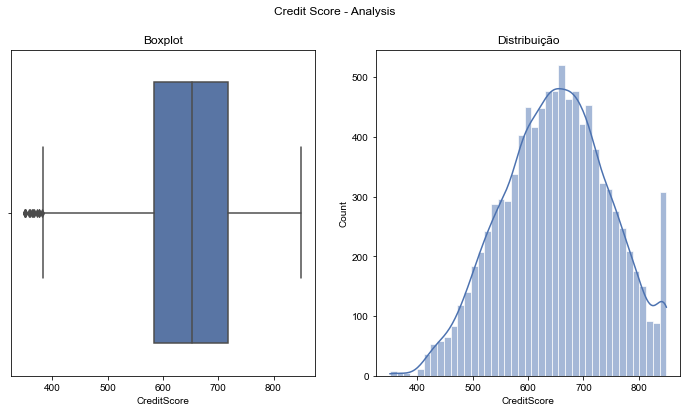

In [9]:
# Credit Score
fig, axes = plt.subplots(1, 2, figsize = (12,6))
fig.suptitle('Credit Score - Analysis')
sns.set_theme(style = 'whitegrid')

# Boxplot
sns.boxplot(ax = axes[0], x = df['CreditScore'])
axes[0].set_title('Boxplot')

# Displot
sns.histplot(ax = axes[1], x = df['CreditScore'], kde = True)
axes[1].set_title('Distribuição')
axes[1].set_xlabel('CreditScore')

In [10]:
# Verificando assimetria com o skewness
df['CreditScore'].skew()

-0.07160660820092675

Na variável CreditScore, podemos perceber uma leve assimetria para a direita, o que indica que os clientes possuem um score mais elevado.
O valor de skewness(assimetria) é um pouco menor que 0, ou seja, apresenta uma cauda a esquerda que também é verificado no histograma.

**Age (Idade)**

Text(0.5, 0, 'Age')

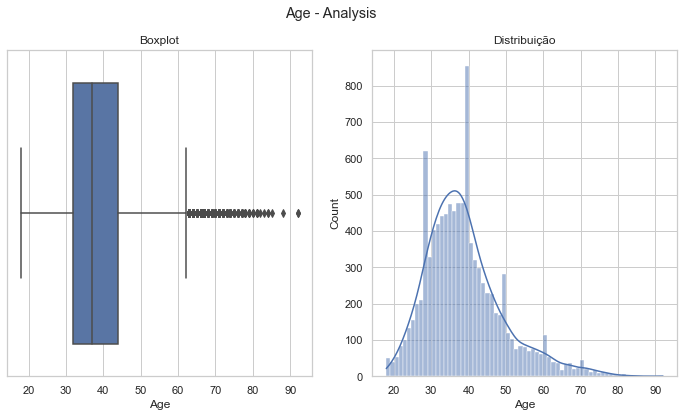

In [11]:
# Age
fig, axes = plt.subplots(1, 2, figsize = (12,6))
fig.suptitle('Age - Analysis')
sns.set_theme(style = 'whitegrid')

# Boxplot
sns.boxplot(ax = axes[0], x = df['Age'])
axes[0].set_title('Boxplot')

# Displot
sns.histplot(ax = axes[1], x = df['Age'], kde = True)
axes[1].set_title('Distribuição')
axes[1].set_xlabel('Age')

In [12]:
# Verificando assimetria a direita com o skewness
df.Age.skew()

1.0113202630234552

Observando os gráficos e também o cálculo de skewness, podemos perceber uma assimetria a esqueda, com uma cauda na direita. Isso representa que grande partes dos clientes tem uma idade menor, mais especificamente entre 20 e 60 anos.

**Tenure**

Text(0.5, 0, 'Tenure')

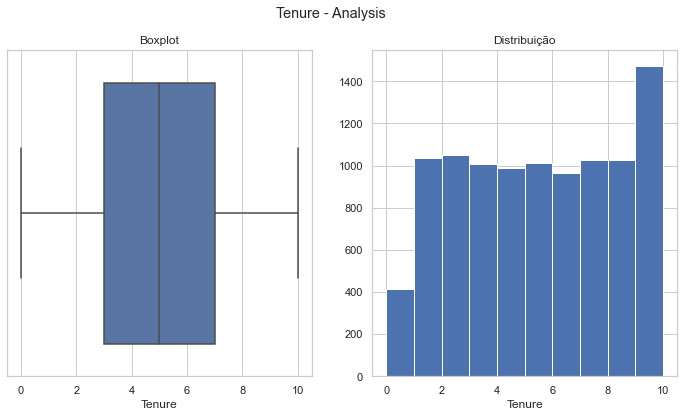

In [13]:
# Tenure
fig, axes = plt.subplots(1, 2, figsize = (12,6))
fig.suptitle('Tenure - Analysis')
sns.set_theme(style = 'whitegrid')

# Boxplot
sns.boxplot(ax = axes[0], x = df['Tenure'])
axes[0].set_title('Boxplot')

# Displot
df.Tenure.hist(ax = axes[1])
axes[1].set_title('Distribuição')
axes[1].set_xlabel('Tenure')

A variável Tenure representa o tempo que o cliente está no banco. Podemos ver temos uma alta frequência em 10, que representa um alto número de clientes que estão no banco a mais tempo, e uma baixa frequência em 0.

**Num of Products**

Text(0.5, 0, 'NumOfProducts')

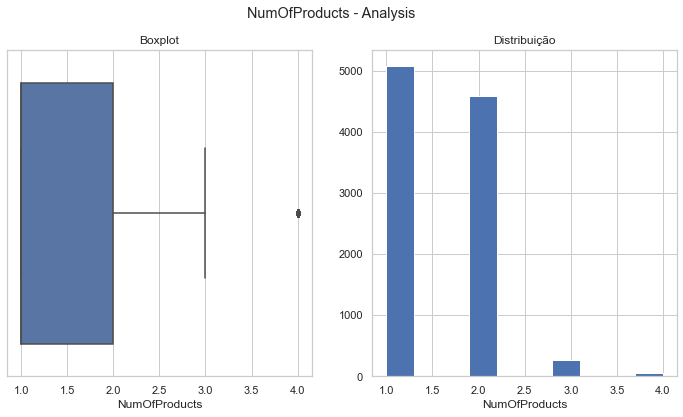

In [14]:
# Num of Product
fig, axes = plt.subplots(1, 2, figsize = (12,6))
fig.suptitle('NumOfProducts - Analysis')
sns.set_theme(style = 'whitegrid')

# Boxplot
sns.boxplot(ax = axes[0], x = df['NumOfProducts'])
axes[0].set_title('Boxplot')

# Displot
df['NumOfProducts'].hist(ax = axes[1])
axes[1].set_title('Distribuição')
axes[1].set_xlabel('NumOfProducts')

Esta variável tem um comportamento interessante, podemos ver que a grande maioria dos clientes adquirem 1 ou 2 produtos do banco. Enquanto, menos de 10% dos clientes adquirem mais de 2 produtos.

**Balance**

Text(0.5, 0, 'Balance')

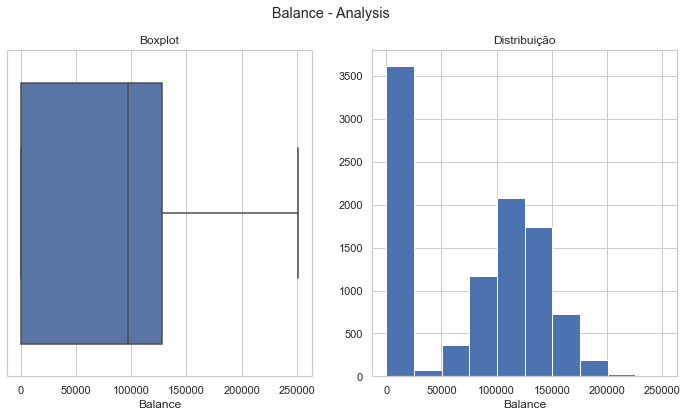

In [15]:
# Balance
fig, axes = plt.subplots(1, 2, figsize = (12,6))
fig.suptitle('Balance - Analysis')
sns.set_theme(style = 'whitegrid')

# Boxplot
sns.boxplot(ax = axes[0], x = df['Balance'])
axes[0].set_title('Boxplot')

# Displot
df['Balance'].hist(ax = axes[1])
axes[1].set_title('Distribuição')
axes[1].set_xlabel('Balance')

Podemos ver que grande parte dos cliente não possuem dinheiro na conta, então talvez este seja um fator a ser observado. Tirando os clientes que tem saldo 0, a distribuição de 'Balance' é praticamente normal.

**Estimated Salary**

Text(0.5, 0, 'EstimatedSalary')

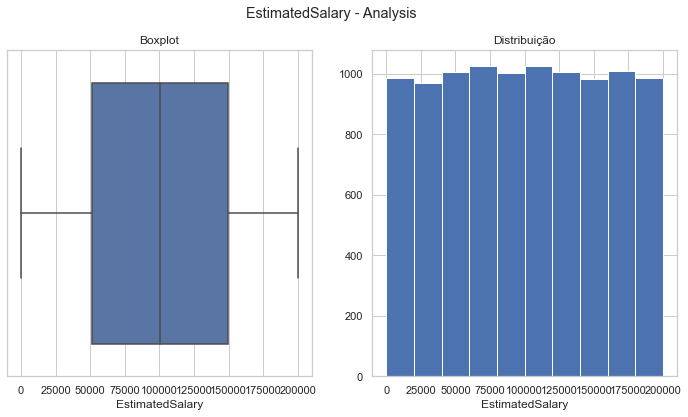

In [16]:
# EstimatedSalary
fig, axes = plt.subplots(1, 2, figsize = (12,6))
fig.suptitle('EstimatedSalary - Analysis')
sns.set_theme(style = 'whitegrid')

# Boxplot
sns.boxplot(ax = axes[0], x = df['EstimatedSalary'])
axes[0].set_title('Boxplot')

# Displot
df['EstimatedSalary'].hist(ax = axes[1])
axes[1].set_title('Distribuição')
axes[1].set_xlabel('EstimatedSalary')

Observando o salário estimado, verificamos que tem uma distribuição uniforme, ou seja, tem praticamente a mesma quantidade de clientes para cada faixa de salário.

**HasCrCard**

Text(0.5, 1.0, 'HasCrCard - Analysis')

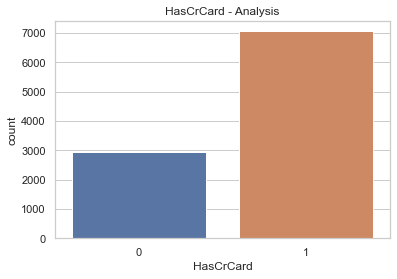

In [17]:
sns.set_theme(style = 'whitegrid')
sns.countplot(df['HasCrCard']).set_title('HasCrCard - Analysis')

Através do gráfico acima, observa-se que grande parte dos clientes possuem cartão de crédito. Cerca de 70%.

**Geography**

Text(0.5, 1.0, 'Geography - Analysis')

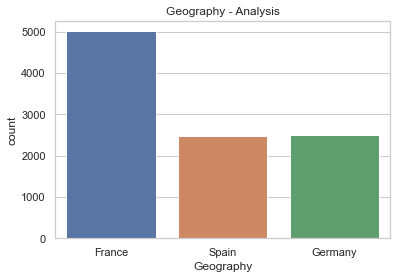

In [18]:
sns.set_theme(style = 'whitegrid')
sns.countplot(df['Geography']).set_title('Geography - Analysis')

Em relação aos países, a maior quantidade dos clientes são provinientes da França

**Gender**

Text(0.5, 1.0, 'Gender - Analysis')

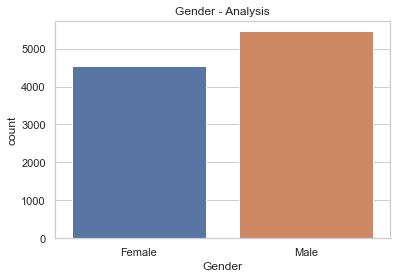

In [19]:
sns.set_theme(style = 'whitegrid')
sns.countplot(df['Gender']).set_title('Gender - Analysis')

Quanto ao gênero dos clientes, tem mais homens do que mulheres.

**IsActiveMember**

Text(0.5, 1.0, 'IsActiveMember - Analysis')

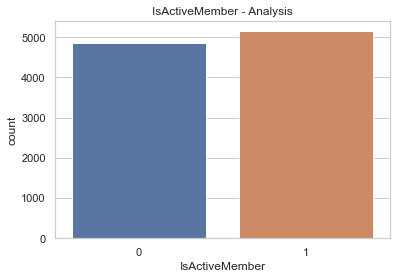

In [20]:
sns.set_theme(style = 'whitegrid')
sns.countplot(df['IsActiveMember']).set_title('IsActiveMember - Analysis')

Em relação aos membros ativos, podemos ver que está bem próximo a quantidade de membros ativos e inativos

**Exited**

Text(0.5, 1.0, 'Exited - Analysis')

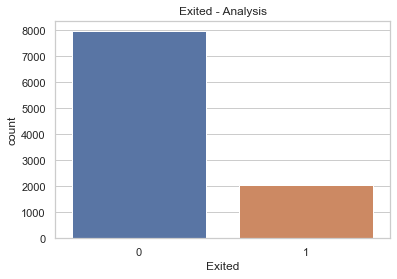

In [21]:
sns.set_theme(style = 'whitegrid')
sns.countplot(df['Exited']).set_title('Exited - Analysis')

In [22]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Por fim, a variável mais importante, que é a quantidade de clientes que sairam do banco. Como foi mostrando anteriormente, o banco teve um Churn de aproximadamente 20%.

## Correlação entre variáveis numéricas

<AxesSubplot:>

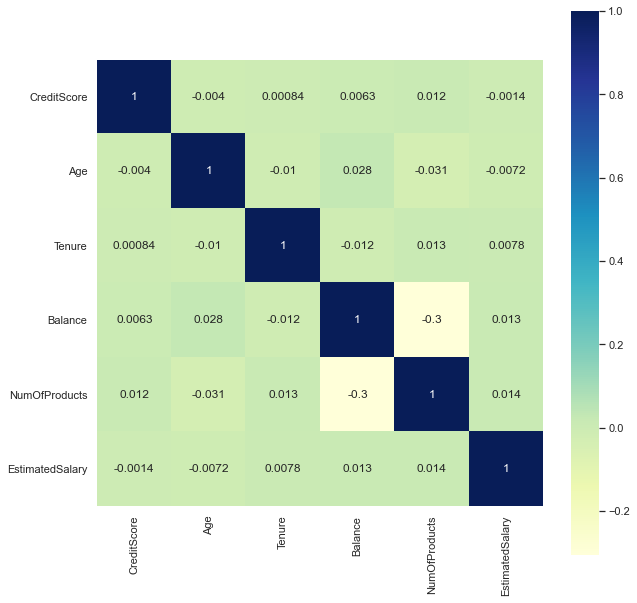

In [23]:
# Tamanho da figura
plt.figure(figsize = (10, 10))

# HeatMap
sns.heatmap(df_num.corr(), vmax = 1, annot = True, square = True, cmap="YlGnBu")

Podemos ver que as variáveis apresentam baixa correlação entre si, com exceção das variáveis Balance e NumOfProducts, que apresentam uma correlação de -0,3. Como é uma correlação negativa, indica que quanto maior o número de produtos do cliente, menor o seu saldo bancário.

## Análise das variáveis em relação a variável Churn

A etapa posterior da etapa de entedimento dos dados separadamente é analisar como as variáveis estão com a variável Churn. iremos comparar a variável Churn com as variáveis categóricas e numéricas, e obter insights sobre o perfil dos clientes que entraram ou não em Churn.

Para ficar melhor visualmente, vamos mudar a variável Churn para: 0 = Não e 1 = Sim.

In [24]:
df['Exited_cat']=df['Exited'].replace([0,1],['Não','Sim'])

### Variáveis categóricas

### Gender

In [25]:
# Gender
plot_gender = df.groupby('Gender').Exited.mean().reset_index()
plot_gender

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


Text(0, 0.5, '% Churn')

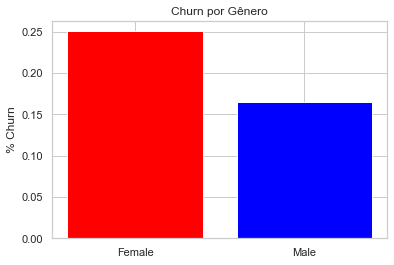

In [26]:
# Criando o gráfico para ficar mais visível
x = plot_gender['Gender']
y = plot_gender['Exited']
plt.bar(x, y, color = ['red', 'blue'])
plt.title('Churn por Gênero')
plt.ylabel('% Churn')

Segundo o gráfico acima, as mulheres apresentam maior churn do que os homens.

### País

In [27]:
pais_plot = df.groupby('Geography').Exited.mean().reset_index().sort_values(by = ['Exited'], ascending = False)
pais_plot

,Geography,Exited
1,Germany,0.324432
2,Spain,0.166734
0,France,0.161548


Text(0.5, 0, 'País')

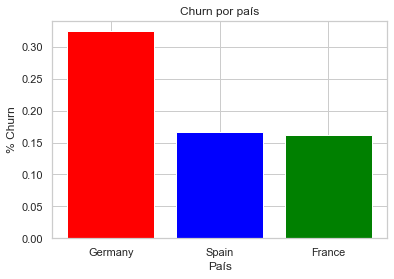

In [28]:
# Criando o gráfico
x = pais_plot['Geography']
y = pais_plot['Exited']
plt.bar(x, y , color = ['red', 'blue', 'green'])
plt.title('Churn por país')
plt.ylabel('% Churn')
plt.xlabel('País')

Segundo o gráfico acima, a Alemanha é o país que apresenta maior churn, seguindo por Espanha e França

### HasCrCard

In [29]:
plot_card = df.groupby('HasCrCard').Exited.mean().reset_index()
plot_card

# Transformando 0 para não e 1 para sim
plot_card['HasCrCard'] = plot_card['HasCrCard'].replace([0,1],['Não', 'Sim'])
plot_card

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


Text(0.5, 0, 'Tem cartão')

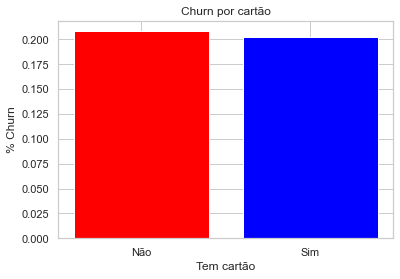

In [30]:
# Criando o gráfico
x = plot_card['HasCrCard']
y = plot_card['Exited']
plt.bar(x, y, color = ['red', 'blue'])
plt.title('Churn por cartão')
plt.ylabel('% Churn')
plt.xlabel('Tem cartão')

O cliente ter cartão ou não praticamente não afeta a porcentagem do Churn

### Active Member

In [31]:
mem_plot = df.groupby('IsActiveMember').Exited.mean().reset_index()
mem_plot

# Transformando o 0 para não e 1 para sim
mem_plot['IsActiveMember'] = mem_plot['IsActiveMember'].replace([0,1], ['Não', 'Sim'])
mem_plot

,IsActiveMember,Exited
0,Não,0.268509
1,Sim,0.142691


Text(0.5, 0, 'Membro ativo ou não')

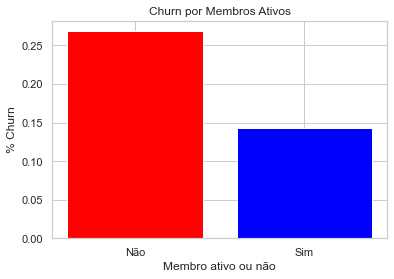

In [32]:
# Plotando o gráfico
x = mem_plot['IsActiveMember']
y = mem_plot['Exited']
plt.bar(x, y, color = ['red', 'blue'])
plt.title('Churn por Membros Ativos')
plt.ylabel('% Churn')
plt.xlabel('Membro ativo ou não')


Portanto, podemos perceber que os membros que não são ativos em movimentações de conta, possuem uma maior taxa de churn.

### Variável número de produtos

In [33]:
prod_plot = df.groupby('NumOfProducts').Exited.mean().reset_index()
prod_plot

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


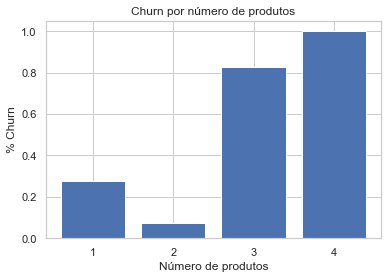

In [34]:
# Plotando o gráfico
x = prod_plot['NumOfProducts']
y = prod_plot['Exited']
plt.bar(x, y)
plt.title('Churn por número de produtos')
plt.ylabel('% Churn')
plt.xlabel('Número de produtos')
plt.xticks(x, (1,2,3,4));

Muito interessante este gráfico, pois mostra que a porcentagem de Churn aumenta para as pessoas com maior número de produtos chegando a 100% no caso da pessoa com 4 produtos adquiridos.

### Tenure

In [35]:
ten_plot = df.groupby('Tenure').Exited.mean().reset_index()
ten_plot

,Tenure,Exited
0,0,0.230024
1,1,0.224155
2,2,0.191794
3,3,0.211100
4,4,0.205258
5,5,0.206522
6,6,0.202689
7,7,0.172179
8,8,0.192195
9,9,0.216463


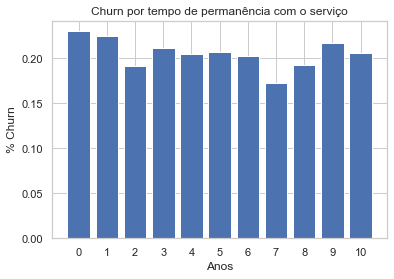

In [36]:
x = ten_plot['Tenure']
y = ten_plot['Exited']
plt.bar(x, y)
plt.title('Churn por tempo de permanência com o serviço')
plt.ylabel('% Churn')
plt.xlabel('Anos')
plt.xticks(x, (0,1,2,3,4,5,6,7,8,9,10));

A taxa de Churn para o tempo de permanência com o serviço não parece variar bastante exceto para cliente com 1 ano ou menos.

### Balance

In [37]:
bal_plot = df.groupby('Exited').Balance.mean().reset_index()
bal_plot

# Transformando a variável Exited
bal_plot['Exited'] = bal_plot['Exited'].replace([0,1], ['Não', 'Sim'])
bal_plot

,Exited,Balance
0,Não,72745.296779
1,Sim,91108.539337


Text(0.5, 1.0, 'Boxplot de Balance por Churn')

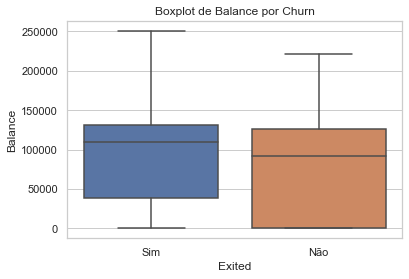

In [38]:
# Criando o gráfico
bal_plot2 = df.copy()
bal_plot2['Exited'] = bal_plot2['Exited'].replace([0,1], ['Não', 'Sim'])
bal_plot2

sns.boxplot(x = bal_plot2['Exited'], y = bal_plot2['Balance']).set_title('Boxplot de Balance por Churn')


Analisando o boxplot de balanço, podemos perceber que o clientes que não sairam possuem em média um balanço menor na conta do que quem saiu.

### Estimated Salary

Text(0.5, 1.0, 'Churn por Salário Estimado')

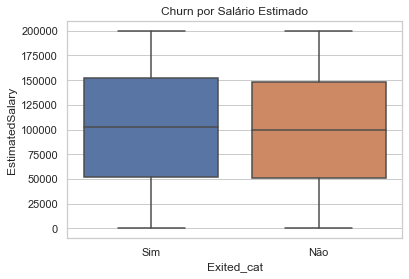

In [39]:
sns.boxplot(x = df['Exited_cat'], y = df['EstimatedSalary']).set_title('Churn por Salário Estimado')

Segundo o gráfico acima, o salário estimado não parece ter uma grande influência no churn, visto que apresentam valores bem próximos para caso de cliente ter saido ou não.

### Age

In [40]:
age_plot = df.groupby('Age').Exited.mean().reset_index()
age_plot

,Age,Exited
0,18,0.090909
1,19,0.037037
2,20,0.050000
3,21,0.056604
4,22,0.142857
...,...,...
65,83,0.000000
66,84,0.500000
67,85,0.000000
68,88,0.000000


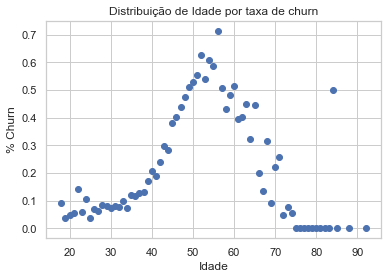

In [41]:
# ScatterPlot
x = age_plot['Age']
y = age_plot['Exited']
plt.scatter(x, y)
plt.title('Distribuição de Idade por taxa de churn')
plt.ylabel('% Churn')
plt.xlabel('Idade');

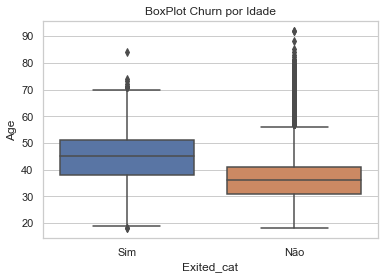

In [42]:
# BoxPlot
sns.boxplot(x = df['Exited_cat'], y = df['Age'])
plt.title('BoxPlot Churn por Idade');

Podemos observar através do gráfico de dispersão, que o grupo entre 50 e 60 anos apresentam uma alta taxa de churn em relação a outros grupos.

E através do boxplot, que a idade média de quem entra em churn é maior do que quem não entrou em churn

### Score de Crédito

In [43]:
score_plot = df.groupby('CreditScore').Exited.mean().reset_index()
score_plot

,CreditScore,Exited
0,350,1.000000
1,351,1.000000
2,358,1.000000
3,359,1.000000
4,363,1.000000
...,...,...
455,846,0.400000
456,847,0.333333
457,848,0.000000
458,849,0.250000


Text(0.5, 1.0, 'Boxplot Score de Crédito por Churn')

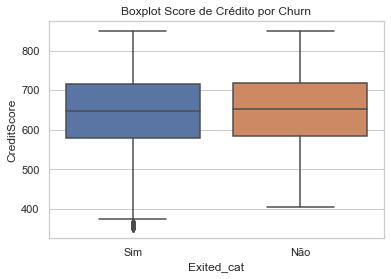

In [44]:
sns.boxplot(x = df['Exited_cat'], y = df['CreditScore'])
plt.title('Boxplot Score de Crédito por Churn')

Text(0.5, 1.0, 'Taxa de Churn por Score de Crédito')

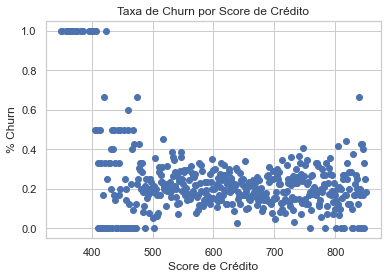

In [45]:
x = score_plot['CreditScore']
y = score_plot['Exited']
plt.scatter(x, y)
plt.xlabel('Score de Crédito')
plt.ylabel('% Churn')
plt.title('Taxa de Churn por Score de Crédito')

Através dos gráficos, primeiramente podemos perceber que não há diferença na média dos scores de quem entrou em churn para quem não entrou em churn. Porém, no boxplot pode-se perceber que possuem alguns outliers no caso dos clientes que entraram em churn.

E quando olhamos no segundo gráfico, o gráfico de dispersão, podemos ver um quantidade até que alta de clientes que tinham um baixo score de crédito entrar em churn. Sendo assim, percebemos um impacto do score na taxa de churn.

# Baseline e pré-processamento dos dados

Após a extensa tarefa de exploração dos dados, onde foi possível obter diversos insights sobre o perfil dos clientes que entraram ou não em churn, vamos entrar na etapa de pré-processamento dos dados.

Mas, antes de fazer qualquer alteração nos dados, vou criar alguns modelos de Machine Learning para estes modelos servirem como baseline. Sendo assim, após qualquer alteração no conjunto de dados iremos reavaliar como esta alteração afetou a criação do modelo.

### Removendo variáveis irrelevantes

Antes de treinar o modelo, serão removidas variáveis que não fazem sentido o modelo tentar aprender. São as variáveis RowNumber, CustomerId, Surname.

In [46]:
# Criando uma cópia do df
df1 = df.copy()

# Excluindo as variáveis (por slicing mesmo)
df1 = df.iloc[:, 3:14]
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Passando as variáveis string para numérico

Uma etapa importante a se fazer no processo de criação de modelos de ML, é transformar as variáveis do tipo string para o tipo numérico. Grandes parte dos modelos só aceitam variáveis numéricas e também muita das vezes tem um melhor desempenho com variáveis numéricas.

In [47]:
# Variável Gender
df1['Gender'] = df1['Gender'].replace(['Female', 'Male'], [0, 1])

# Variável Geography
df1['Geography'] = df1['Geography'].replace(['France', 'Germany', 'Spain'], [0, 1, 2])

df1.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,0,28,4,130142.79,1,1,0,38190.78,0


### Separando os dados em treino e teste

In [48]:
from sklearn.model_selection import train_test_split

# Separando as variáveis preditoras e target
X = df1.iloc[:, 0:10]
y = df1.iloc[:, 10]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size = teste_size, random_state = seed)

In [49]:
# Resumo da amostra de dados
print(f'Tamanho dos dados de treino das variáveis preditoras {X_treino.shape}')
print(f'Tamanho dos dados de teste das variáveis preditoras {X_teste.shape}')
print(f'Tamanho dos dados de treino da variável target {Y_treino.shape}')
print(f'Tamanho dos dados de treino da variável target {Y_teste.shape}')

Tamanho dos dados de treino das variáveis preditoras (6700, 10)
Tamanho dos dados de teste das variáveis preditoras (3300, 10)
Tamanho dos dados de treino da variável target (6700,)
Tamanho dos dados de treino da variável target (3300,)


### Criação do modelo de baseline - Regressão Logística

Para o modelo de classificação base, escolhi o modelo de regressão logística, que é um ótimo modelo classificador. Porém, como mencionado anteriormente não irei fazer nenhuma alteração nos dados. 

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      2641
           1       0.37      0.05      0.10       659

    accuracy                           0.79      3300
   macro avg       0.59      0.52      0.49      3300
weighted avg       0.72      0.79      0.73      3300

[[2580   61]
 [ 623   36]]


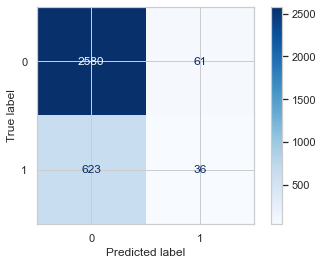

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Criando o modelo
modelo = LogisticRegression(max_iter = 300)
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = modelo.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

# Imprimindo matrix de confusão
conf_mat = confusion_matrix(Y_teste, previsoes)
print(conf_mat)

# Plotando graficamente a matriz de confusão
plot_confusion_matrix(modelo, X_teste, Y_teste,
                                 cmap=plt.cm.Blues)
plt.show()

No modelo de baseline, teve-se uma acurácia 79%, o que é relativamente bom para um primeiro modelo. Porém, quando olhamos para a classe 1, que são os clientes que entraram em Churn, o modelo acertou apenas 36/639, ou seja, o modelo acertou 5% dos casos apenas.

Isso já era esperado porque os dados da variável target estão desbalanceados, sendo assim o modelo vai aprender mais de uma classe do que outra. Portanto, será necessário balancear a classe.

### Balanceamento de classes

Quando se fala em balanceamento de classe, posso ter duas abordagens. A primeira é fazer um subsampling do dados, que é diminuir os dados da classe que tem maior número de observações, e o oversampling que é aumentar o número de amostras da classe que tem menos observações.

Neste problema, vou adotar a técnica de oversampling SMOTE, porque temos um conjunto de dados relativamente pequenos então se fosse aplicar o subsampling diminuiria ainda mais o conjunto de dados. No caso do balanceamento de classe, não preciso aplicar nos dados de teste, somente nos dados de treino que serão usados para o modelo aprender.

In [51]:
# Importa a função
from imblearn.over_sampling import SMOTE

# Cria o balanceador SMOTE
smote_bal = SMOTE()

# Aplica o balanceador
X_treino_bal, Y_treino_bal = smote_bal.fit_resample(X_treino, Y_treino)

In [52]:
# Verificando como ficou os dados balanceados

print('Antes do balanceamento:')
print(f'Dados de treino X: {X_treino.shape}')
print(f'Dados de treino Y: {Y_treino.shape}\n')

print('Depois do balanceamento:')
print(f'Dados de treino X: {X_treino_bal.shape}')
print(f'Dados de treino Y: {Y_treino_bal.shape}')

Antes do balanceamento:
Dados de treino X: (6700, 10)
Dados de treino Y: (6700,)

Depois do balanceamento:
Dados de treino X: (10644, 10)
Dados de treino Y: (10644,)


<AxesSubplot:xlabel='Exited', ylabel='count'>

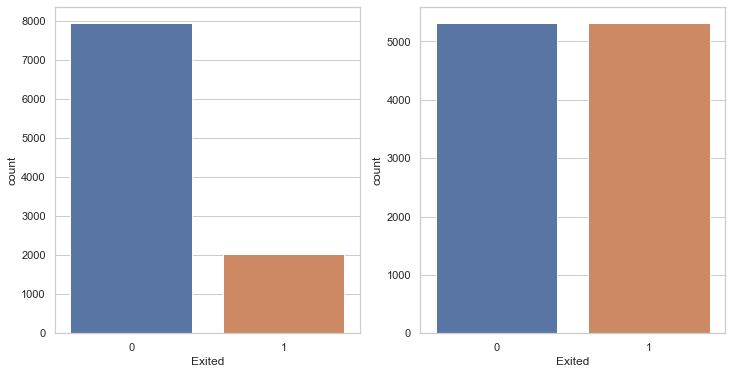

In [53]:
# Plotando os gráficos antes e depois do balanceamento
fig, ax = plt.subplots(1, 2, figsize = (12,6))

sns.countplot(ax = ax[0], x = df['Exited'])

sns.countplot(ax = ax[1], x = Y_treino_bal)

Com os dados balanceados, podemos partir para a versão 2 do modelo de Regressão Logística

### Versão 2 do modelo

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      2641
           1       0.33      0.69      0.44       659

    accuracy                           0.65      3300
   macro avg       0.61      0.67      0.60      3300
weighted avg       0.78      0.65      0.69      3300



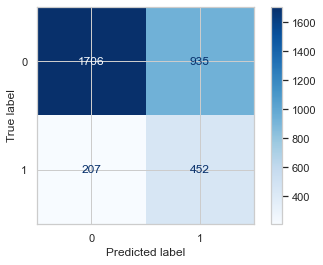

In [54]:
# Criando o modelo
modelo2 = LogisticRegression(max_iter = 300)
modelo2.fit(X_treino_bal, Y_treino_bal)

# Fazendo as previsões e construindo o relatório
previsoes = modelo2.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

# Plotando graficamente a matriz de confusão
plot_confusion_matrix(modelo2, X_teste, Y_teste,
                                 cmap=plt.cm.Blues)
plt.show()

Na versão 2 do modelo, conseguimos aumentar a quantidade de vezes que o modelo acertou a classe de Churn, antes o modelo tinha acertado 5%, agora ele acertou 452/659, ou seja 69%. É uma grande melhora no modelo. Porém, se formos ver na acurária geral no modelo, ela caiu de 79% para 66%, o que é uma perda grande também.

A próxima etapa, será aplicar padronização nos dados, para avaliar o comportamento do modelo.

### Padronização dos dados

In [55]:
# Padronização
from sklearn.preprocessing import StandardScaler

# Criando o padronizador
sc = StandardScaler()

# Aplicando aos dados de treino e teste
X_treino_bal_scaled = sc.fit_transform(X_treino_bal)
X_teste_scaled = sc.transform(X_teste)

### Versão 3 do modelo

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      2641
           1       0.37      0.58      0.45       659

    accuracy                           0.72      3300
   macro avg       0.62      0.66      0.63      3300
weighted avg       0.78      0.72      0.74      3300



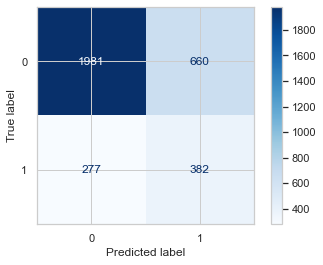

In [56]:
# Criando o modelo
modelo3 = LogisticRegression(max_iter = 300)
modelo3.fit(X_treino_bal_scaled, Y_treino_bal)

# Fazendo as previsões e construindo o relatório
previsoes = modelo3.predict(X_teste_scaled)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

# Plotando graficamente a matriz de confusão
plot_confusion_matrix(modelo3, X_teste_scaled, Y_teste,
                                 cmap=plt.cm.Blues)
plt.show()

Pontos a observar sobre a padronização dos dados. Primeiro, conseguimos aumentar a acurácia do modelo de 66% para 72%, porém diminuiu a performance nos dados dos clientes com churn para 59%. Eu poderia tentar melhorar o modelo, fazendo uma otimização de parâmetros com Grid ou RandomSearch, mas antes disso vou tentar novos modelos antes. 

Vou testar como se comportam 2 algoritmos de ML Ensemble, que é o Random Forest e o XGboost.

### Random Forest

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      2641
           1       0.51      0.61      0.56       659

    accuracy                           0.81      3300
   macro avg       0.70      0.73      0.72      3300
weighted avg       0.82      0.81      0.81      3300



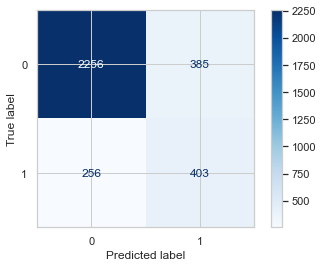

In [57]:
# Import Library
from sklearn.ensemble import RandomForestClassifier

# Criando o objeto Random Forest 
RF = RandomForestClassifier()

RF.fit(X_treino_bal_scaled, Y_treino_bal)

# Fazendo as previsões e construindo o relatório
previsoes = RF.predict(X_teste_scaled)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

# Plotando graficamente a matriz de confusão
plot_confusion_matrix(RF, X_teste_scaled, Y_teste,
                                 cmap=plt.cm.Blues)
plt.show()

In [58]:
RF.feature_importances_

array([0.10948109, 0.04502037, 0.06069978, 0.21895711, 0.07020345,
       0.12476239, 0.10841643, 0.02011867, 0.12072279, 0.12161794])

O modelo de Random Forest apresentou melhor comportamento do que o modelo de Regressão Logística, apresentou uma acurácia de 81% e para a variável Churn, apresentou acurácia de 62%.

### XGboost

[12:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      2641
           1       0.52      0.63      0.57       659

    accuracy                           0.81      3300
   macro avg       0.71      0.74      0.72      3300
weighted avg       0.83      0.81      0.82      3300



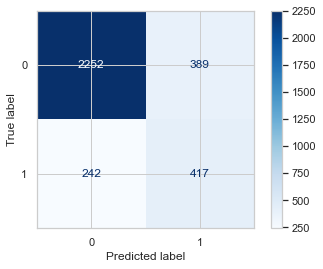

In [59]:
from xgboost import XGBClassifier

# Criando o modelo
xgb = XGBClassifier()

# Treinando o modelo
xgb.fit(X_treino_bal_scaled, Y_treino_bal)

# Fazendo as previsões e construindo o relatório
previsoes = xgb.predict(X_teste_scaled)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

# Plotando graficamente a matriz de confusão
plot_confusion_matrix(xgb, X_teste_scaled, Y_teste,
                                 cmap=plt.cm.Blues)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

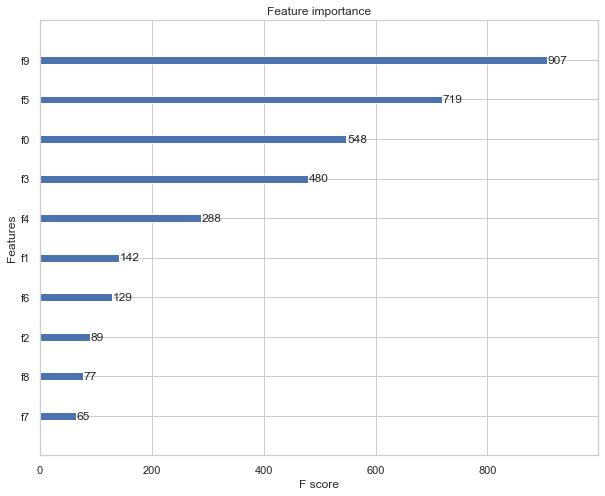

In [60]:
import matplotlib.pyplot as plt 
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

Os resultados do XGBooost, foram bem próximos ao do Random Forest, com uma melhora de 1% nos casos de Churn.

### AutoML

Para melhorar a performance do modelo, poderíamos voltar aos dados e melhorar o pré-processamento, por exemplo criando variáveis dummies. Porém, vou tentar uma abordagem utilizando o PyCaret para obter uma maior variedade de modelos e posteriormente fazer a otimização do modelo que apresentar a melhor performance. 

Primeiramente, vamos setar o setup do nosso treinamento. Como pode ser visto abaixo, o caret já permite aplicar normalização e balanceamento das classes podendo trazer mais eficiência ao processo. 

Definimos as variáveis numéricas e categóricas do modelo, também é fornecido ao setup a variável target.

In [61]:
# Importando o módulo do caret, que trazer os algoritmos de classificação
from pycaret.classification import *

# Setando o setup de treinamento
clf = setup(data = df1, 
            normalize = True,
            numeric_features = ['CreditScore', 'EstimatedSalary', 'Age', 'Tenure', 'Balance'],
            categorical_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'],
            target = 'Exited',
            fix_imbalance = True,
            session_id=123)

,Description,Value
0,session_id,123
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 11)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


A célula abaixo faz o treinamento de vários modelos de ML de forma automatizada, por isso AutoMl, e retorna algumas métricas que servirão de avaliação do modelo.

In [62]:
# Treinamento dos modelos e obtendo o 'melhor modelo'
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8543,0.8547,0.5342,0.6846,0.5985,0.5115,0.5182,10.7860
lightgbm,Light Gradient Boosting Machine,0.8517,0.8526,0.5454,0.6707,0.6005,0.5108,0.5155,0.5980
xgboost,Extreme Gradient Boosting,0.8458,0.8390,0.5146,0.6595,0.5767,0.4844,0.4908,2.1750
et,Extra Trees Classifier,0.8438,0.8389,0.5265,0.6442,0.5792,0.4846,0.4884,0.7170
rf,Random Forest Classifier,0.8411,0.8422,0.5565,0.6270,0.5889,0.4910,0.4928,0.8000
gbc,Gradient Boosting Classifier,0.8371,0.8569,0.6389,0.5962,0.6161,0.5130,0.5140,1.2840
nb,Naive Bayes,0.8177,0.8026,0.1355,0.8415,0.2332,0.1868,0.2908,0.0470
ada,Ada Boost Classifier,0.8077,0.8368,0.6606,0.5242,0.5841,0.4613,0.4668,0.3920
qda,Quadratic Discriminant Analysis,0.7954,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0690
dt,Decision Tree Classifier,0.7830,0.6973,0.5523,0.4740,0.5096,0.3714,0.3736,0.0980


In [64]:
print(best)

In [66]:
best_tuned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8300,0.8501,0.5315,0.5938,0.5609,0.4559,0.4570
1,0.8600,0.8557,0.6084,0.6744,0.6397,0.5531,0.5542
2,0.8314,0.8340,0.4476,0.6214,0.5203,0.4213,0.4297
3,0.8343,0.8269,0.4685,0.6262,0.5360,0.4377,0.4445
4,0.8671,0.8717,0.5594,0.7273,0.6324,0.5530,0.5601
5,0.8714,0.8919,0.5944,0.7265,0.6538,0.5759,0.5802
6,0.8371,0.8590,0.5734,0.6074,0.5899,0.4884,0.4887
7,0.8529,0.8538,0.5625,0.6694,0.6113,0.5214,0.5244
8,0.8657,0.8807,0.5556,0.7273,0.6299,0.5497,0.5571
9,0.8670,0.8755,0.5734,0.7193,0.6381,0.5579,0.5633


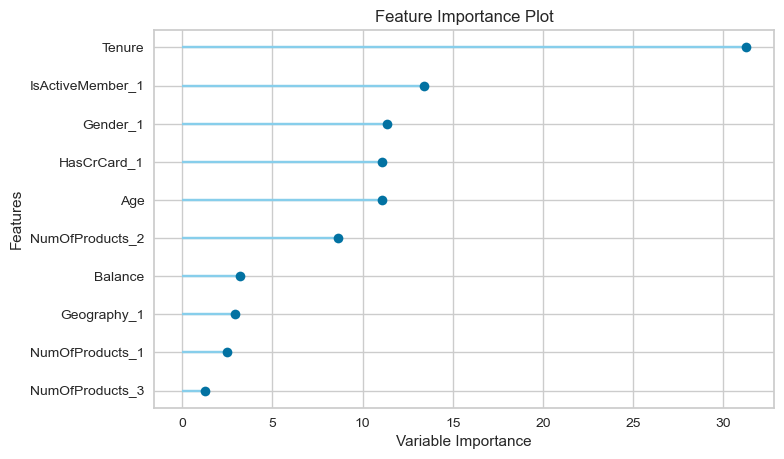

In [67]:
# Avaliando as váriaveis mais importantes para o modelo
plot_model(best_tuned, plot='feature')

Para o modelo treinado acima, no caso o CatBoost, que apresentou melhor acurácia, o que mais impactou no treinamento foi o tempo de permanência do cliente no banco e se o membro é ativo ou não.

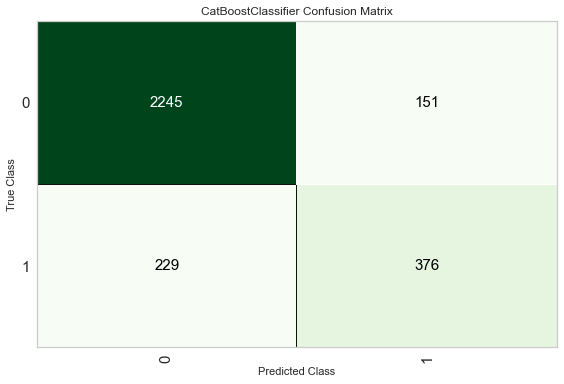

In [68]:
# Matriz de confusão
plot_model(best_tuned, plot = 'confusion_matrix')

Na matriz de confusão surge outro fator a ser analisar. Lembrando do problema de negócio, queremos predizer se o cliente vai entrar em Churn. Dessa forma, o modelo deve acertar o máximo possível de clientes que entraram em churn nos dados históricos, para que possa ser pensado algumas soluções para oferecer aos clientes.

Então, é mais importante eu acertar os clientes que entraram em Churn, do que eu classificar como Churn os que não entraram em Churn antes.

Sendo assim, o melhor obtido não tem tanto sucesso em classificar os clientes em Churn. A métrica que vai dizer realmente se o modelo está melhorando ou não a eficiência é a métrica recall.

Olhando novamente a lista com modelos treinados, o modelo que apresenta o maior recall é o modelo de LDA, Linear Discriminant Analysis. Então, vou selecionar o modelo e verificar como está a confusion matrix, se apresenta uma melhora significativa dos casos com churn.

In [69]:
# Criando o modelo de LDA
dt = create_model('lda', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7614,0.8267,0.7552,0.4500,0.5640,0.4139,0.4402
1,0.7486,0.8253,0.7063,0.4298,0.5344,0.3759,0.3976
2,0.7471,0.7977,0.7273,0.4298,0.5403,0.3814,0.4065
3,0.7414,0.7901,0.6853,0.4188,0.5199,0.3568,0.3770
4,0.7714,0.8303,0.7133,0.4615,0.5604,0.4154,0.4334
5,0.7886,0.8608,0.7972,0.4893,0.6064,0.4729,0.4993
6,0.7500,0.8139,0.7483,0.4350,0.5501,0.3934,0.4212
7,0.7229,0.7929,0.7014,0.4008,0.5101,0.3363,0.3620
8,0.7786,0.8643,0.8125,0.4776,0.6015,0.4622,0.4935
9,0.7597,0.8376,0.7692,0.4490,0.5670,0.4162,0.4451


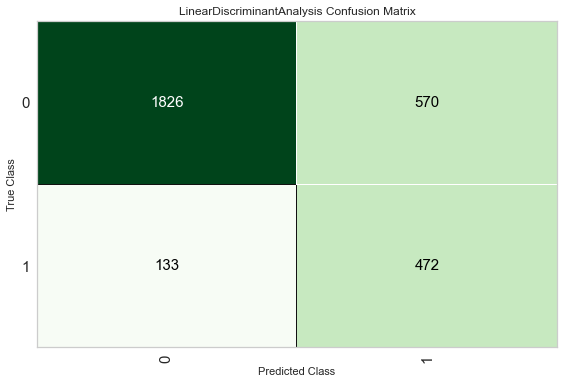

In [70]:
# Confusion Matrix LDA
plot_model(dt, plot = 'confusion_matrix')

Agora sim, podemos ver um aumento significativo do número de clientes que entraram em Churn e foram identificado pelo modelo.
Temos um percentual de 76%.

Nesse ponto é necessário tem uma conversa com a área de negócio para entender a real necessidade da área para avaliar um trade-off dos modelos, se é mais interessante termos um modelo com uma acurácia alta, mas que acerta menos os casos com Churn, ou se um modelo com acurácia menor mas com maior quantidade de acertos de Churn atende ao negócio. 

Irei adotar o modelo de LDA, pois acerta mais os casos com Churn e na minha visão é mais interessante ao negócio.

Outra otimização que podemos fazer no modelo é a calibração do mesmo. É útil quando estamos trabalhando com um modelo de classificação e queremos obter a probabilidade de uma classe ou outra.

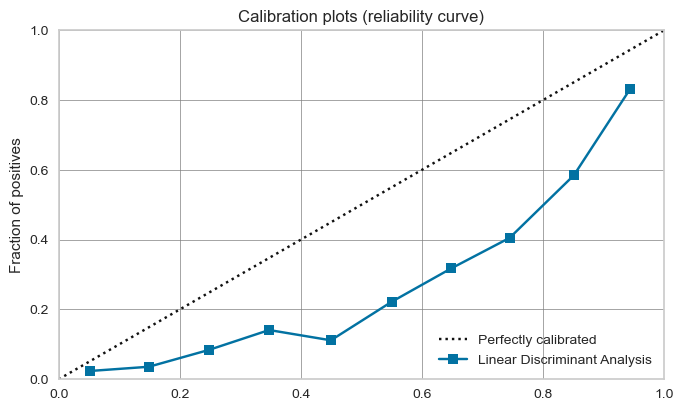

In [71]:
# Plot da calibração do modelo
plot_model(dt, plot = 'calibration')

In [72]:
# Calibrando o modelo
dt_calibrated = calibrate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7600,0.8267,0.7552,0.4481,0.5625,0.4116,0.4383
1,0.7486,0.8252,0.7063,0.4298,0.5344,0.3759,0.3976
2,0.7471,0.7978,0.7273,0.4298,0.5403,0.3814,0.4065
3,0.7400,0.7901,0.6923,0.4177,0.5211,0.3573,0.3788
4,0.7700,0.8303,0.7133,0.4595,0.5589,0.4130,0.4313
5,0.7871,0.8608,0.7972,0.4872,0.6048,0.4705,0.4972
6,0.7500,0.8139,0.7483,0.4350,0.5501,0.3934,0.4212
7,0.7229,0.7928,0.7014,0.4008,0.5101,0.3363,0.3620
8,0.7771,0.8644,0.8125,0.4756,0.6000,0.4598,0.4915
9,0.7597,0.8376,0.7692,0.4490,0.5670,0.4162,0.4451


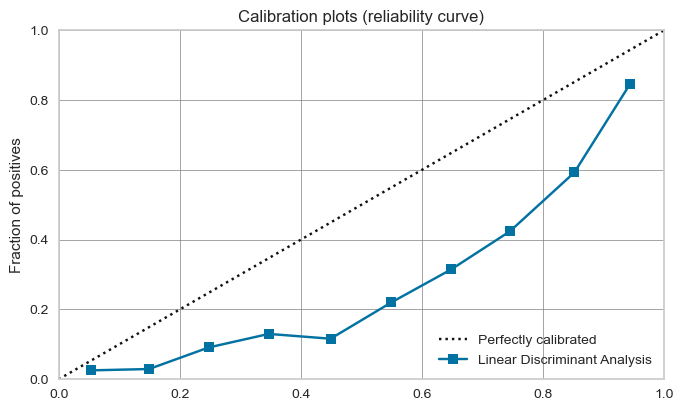

In [73]:
# Após a calibração
plot_model(dt_calibrated, plot = 'calibration')

In [74]:
# Finalizando o modelo
lda_final = finalize_model(dt_calibrated)

In [75]:
# Salvando o mdelo
save_model(dt, 'lda_model_churn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Geography',
                                                             'Gender',
                                                             'NumOfProducts',
                                                             'HasCrCard',
                                                             'IsActiveMember'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['CreditScore',
                                                           'EstimatedSalary',
                                                           'Age', 'Tenure',
                                                           'Balance'],
                                       target='Exited', time_features=[]

In [76]:
# Load Model
lda = load_model('lda_model_churn')

Transformation Pipeline and Model Successfully Loaded


In [78]:
# Previsões com o modelo
prev = predict_model(lda, data = df1)

,CustomerId,Churn
0,15634602,Sim
1,15647311,Não
2,15619304,Sim
3,15701354,Não
4,15737888,Não
...,...,...
9995,15606229,Não
9996,15569892,Não
9997,15584532,Não
9998,15682355,Não


### Retornando as probabilidades de ser churn ou não

Outra métrica importante que pode ser avaliada é a probabilidade de churn acontecer ou não. É importante pois podem ser priorizados os clientes que possuem maior probabilidade de churn.

O nosso modelo de previsões retorna uma variável chama Score, que retorna a probabilidade da observação pertencer a classe 0 ou 1. Então, temos que fazer um pequeno cálculo para obter a porcentagem entrar em churn, no caso da pessoa que não ter entrado em churn.

É apenas, subtrair 1 - a probabildade de não entrar em churn.

In [98]:
# Criar coluna de probabilidade
prev['prob_churn'] = np.nan

# Loop para criar a coluna com probabilidades
for obs in range(len(prev['Label'])):
    if prev['Label'][obs] == 0:
        prev['prob_churn'][obs] = 1 - prev['Score'][obs]
    else:
        prev['prob_churn'][obs] = prev['Score'][obs]    

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label,Score,prob,prob_churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,0.5020,NaN,0.5020
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0,0.5205,NaN,0.4795
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,0.9470,NaN,0.9470
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,0.7404,NaN,0.2596
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,0.5275,NaN,0.4725


In [105]:
# Verificando alguns registros
prev.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label,Score,prob_churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,0.5020,0.5020
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0,0.5205,0.4795
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,0.9470,0.9470
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,0.7404,0.2596
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,0.5275,0.4725
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1,0,0.7610,0.2390
6,822,0,1,50,7,0.00,2,1,1,10062.80,0,0,0.8809,0.1191
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1,1,0.9789,0.9789
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0,0,0.9050,0.0950
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0,0,0.8651,0.1349


In [103]:
# Fazendo a junção com os dados iniciais e entregando a solução para o cliente.
resultados_finais = pd.DataFrame(df['CustomerId'])
resultados_finais['Probalidade Churn'] = pd.DataFrame(prev['prob_churn']) * 100
resultados_finais

,CustomerId,Probalidade Churn
0,15634602,50.20
1,15647311,47.95
2,15619304,94.70
3,15701354,25.96
4,15737888,47.25
...,...,...
9995,15606229,15.95
9996,15569892,24.03
9997,15584532,33.03
9998,15682355,42.94


In [101]:
# Salvando o resultado do trabalho em um arquivo csv
resultados_finais.to_csv('resultados.csv')

In [102]:
# Verificando quanto geraria de receita para os clientes

# localizando os resultados que o modelo acertou
test = prev.loc[lambda prev: prev['Exited'] == prev['Label']]

# Dos resultados que o modelo acertou, selecionamos somente aqueles com churn
test = test.loc[lambda test: test['Label'] == 1]

# Obtendo a renda total desses clientes, e obtendo o 10%
receita = test['EstimatedSalary'].sum() * 0.1
print(f'O banco teria um aumento de receita de ${round(receita, 2)}, considerando um gasto de 10% do salário com despesas com banco')

O banco teria um aumento de receita de $15623366.37, considerando um gasto de 10% do salário com despesas com banco


# Fim do projeto!